In [ ]:
!pip install yahoo-fin      # get stock data from yahoo finance

     |████████████████████████████████| 81 kB 2.4 MB/s 
     |████████████████████████████████| 83 kB 1.6 MB/s 
     |████████████████████████████████| 112 kB 39.7 MB/s 
     |████████████████████████████████| 127 kB 42.7 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=af9df0a771629b306a341f2d56d82b513709032e884fb9a0119dd15926669293
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=e707a14d46118032eeb2643b2d3a78f3135c854c739cecc0cfa6fc84d5f01ea5
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=50de830581242ab62ed25de20f3dae60c1d9669ef15b80fc32d16b24f509a9c7
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [ ]:
!pip install requests_html        # Helps in parsing the HTML (scraping)

In [ ]:
import nltk
nltk.download('vader_lexicon')            #Rule based sentiment analysis tool

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup           # Manipulating the parse tree
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
from yahoo_fin import options

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
website_url = 'https://finviz.com/quote.ashx?t='           # Url for scraping
company_tikcers = ['TTM', 'RELI', 'AAPL', 'GOOGL']        #{TTM; Tata Motors; RELI: Reliance Group; AAPL: Apple; GOOGL: Google}

In [ ]:
# Sending request to url and receiving the response
news_tables = {}

for ticker in company_tikcers:
  url = website_url + ticker

  req = Request(url=url, headers={'user-agent': 'my-scrape'})
  response = urlopen(req)
  html = BeautifulSoup(response, 'html')
  news_data = html.find(id='news-table')
  news_tables[ticker] = news_data

In [ ]:
# Parsing the responce received to get an object list

parsed_data = []

for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    title = row.a.text
    date_data = row.td.text.split(' ')

    if len(date_data) == 1:
      time = date_data[0][0:7]
    else:
      date = datetime.datetime.strptime(date_data[0], '%b-%d-%y').strftime('%Y/%m/%d')
      time = date_data[1][0:7]

    parsed_data.append([ticker, date, time, title])

In [ ]:
parsed_data

[['TTM',
  '2022/05/13',
  '12:25AM',
  'Indian shares track broader Asian stocks higher; Reliance jumps'],
 ['TTM', '2022/05/13', '12:25AM', 'Indian shares end lower on SBI slump'],
 ['TTM',
  '2022/05/12',
  '07:28AM',
  'UPDATE 2-Tata Motors warns of price and chip risks as demand improves'],
 ['TTM',
  '2022/05/11',
  '10:47AM',
  "India's Tata Group readying plan for battery company in India, abroad"],
 ['TTM',
  '2022/05/11',
  '10:22AM',
  "India's Tata Group readying plan for battery company in India, abroad"],
 ['TTM',
  '2022/05/01',
  '07:09PM',
  "Tata, India's electric vehicle king, takes a frugal road less travelled"],
 ['TTM',
  '2022/05/01',
  '07:00PM',
  "FOCUS-Tata, India's electric vehicle king, takes a frugal road less travelled"],
 ['TTM',
  '2022/04/29',
  '07:43AM',
  'UPDATE 1-Tata Motors maps out long-range EVs for India and beyond'],
 ['TTM',
  '2022/04/29',
  '05:21AM',
  'Tata Motors maps out long-range EVs for India and beyond'],
 ['TTM',
  '2022/04/06',
 

In [ ]:
# Using pandas to create a dataframe from object list

dataset = pd.DataFrame(parsed_data, columns=["Company", "Date", "Time", "News Headline"])
dataset.to_csv('CompanyNewsHeadlines_WithoutSentiment.csv', index=False)
dataset.head()

,Company,Date,Time,News Headline
0,TTM,2022/05/13,12:25AM,Indian shares track broader Asian stocks highe...
1,TTM,2022/05/13,12:25AM,Indian shares end lower on SBI slump
2,TTM,2022/05/12,07:28AM,UPDATE 2-Tata Motors warns of price and chip r...
3,TTM,2022/05/11,10:47AM,India's Tata Group readying plan for battery c...
4,TTM,2022/05/11,10:22AM,India's Tata Group readying plan for battery c...


In [ ]:
sia=SentimentIntensityAnalyzer()

dataset['Compound'] = dataset['News Headline'].apply(lambda headline: sia.polarity_scores(headline)['compound'])      # moving headlines from dataframe to a new dataset

In [ ]:
# Defining criterion
def sentiment_declareation(sentiment_value):
  if -0.2 < sentiment_value <= 0.2:
      return 'neu'
  elif 0.2 < sentiment_value <= 1.0:
      return 'pos'
  elif -1.0 <= sentiment_value <= -0.2:
      return 'neg'

In [ ]:
dataset['Sentiment'] = dataset['Compound'].apply(lambda value: sentiment_declareation(value))   # attaching senitiment value based on polarity scores

In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date).dt.date   # adding date and time to dataset

In [ ]:
dataset.head()

,Company,Date,Time,News Headline,Compound,Sentiment
0,TTM,2022-05-13,12:25AM,Indian shares track broader Asian stocks highe...,0.296,pos
1,TTM,2022-05-13,12:25AM,Indian shares end lower on SBI slump,0.000,neu
2,TTM,2022-05-12,07:28AM,UPDATE 2-Tata Motors warns of price and chip r...,-0.052,neu
3,TTM,2022-05-11,10:47AM,India's Tata Group readying plan for battery c...,0.000,neu
4,TTM,2022-05-11,10:22AM,India's Tata Group readying plan for battery c...,0.000,neu


In [ ]:
dataset.to_csv('CompanyNewsHeadlines.csv', index=False)     # Saving dataset as a csv file

In [ ]:
max_min_date = dataset.groupby(['Company']).agg({'Date': [np.min,np.max]})      # minimum and maximum date for headlines for each stock
max_min_date

Date            
               amin        amax
Company                        
AAPL     2022-05-10  2022-05-13
GOOGL    2022-05-06  2022-05-13
RELI     2020-04-29  2022-04-28
TTM      2021-03-17  2022-05-13

In [ ]:
dataset['MaxDate'] = dataset.groupby('Company').Date.transform('max')
dataset['MinDate'] = dataset.groupby('Company').Date.transform('min')

dataset.head()

,Company,Date,Time,News Headline,Compound,Sentiment,MaxDate,MinDate
0,TTM,2022-05-13,12:25AM,Indian shares track broader Asian stocks highe...,0.296,pos,2022-05-13,2021-03-17
1,TTM,2022-05-13,12:25AM,Indian shares end lower on SBI slump,0.000,neu,2022-05-13,2021-03-17
2,TTM,2022-05-12,07:28AM,UPDATE 2-Tata Motors warns of price and chip r...,-0.052,neu,2022-05-13,2021-03-17
3,TTM,2022-05-11,10:47AM,India's Tata Group readying plan for battery c...,0.000,neu,2022-05-13,2021-03-17
4,TTM,2022-05-11,10:22AM,India's Tata Group readying plan for battery c...,0.000,neu,2022-05-13,2021-03-17


In [ ]:
company_early_late_dates = {}

for index, row in dataset.iterrows():
  if row['Company'] in company_early_late_dates:
      company_early_late_dates[row['Company']]['early'] = row['MinDate']
      company_early_late_dates[row['Company']]['late'] = row['MaxDate']
  else:
    company_early_late_dates[row['Company']] = {'early': None, 'late': None}

company_early_late_dates

{'AAPL': {'early': datetime.date(2022, 5, 10),
  'late': datetime.date(2022, 5, 13)},
 'GOOGL': {'early': datetime.date(2022, 5, 6),
  'late': datetime.date(2022, 5, 13)},
 'RELI': {'early': datetime.date(2020, 4, 29),
  'late': datetime.date(2022, 4, 28)},
 'TTM': {'early': datetime.date(2021, 3, 17),
  'late': datetime.date(2022, 5, 13)}}

In [ ]:
for key, value in company_early_late_dates.items():
  print(key, '->', value)
  tmp_df = si.get_data(key, start_date=value['early'], end_date=value['late'])
  tmp_df['date'] = tmp_df.index
  tmp_df.to_csv(key + '_NLTK.csv', index=False)

TTM -> {'early': datetime.date(2021, 3, 17), 'late': datetime.date(2022, 5, 13)}
RELI -> {'early': datetime.date(2020, 4, 29), 'late': datetime.date(2022, 4, 28)}
AAPL -> {'early': datetime.date(2022, 5, 10), 'late': datetime.date(2022, 5, 13)}
GOOGL -> {'early': datetime.date(2022, 5, 6), 'late': datetime.date(2022, 5, 13)}


In [ ]:
# Finding total no of sentiment categorisation

sentiment_result = {}
for value in dataset['Sentiment']:
  if value in sentiment_result:
    if value == 'neu':
      sentiment_result['neu'] += 1
    elif value == 'pos':
      sentiment_result['pos'] += 1
    elif value == 'neg':
      sentiment_result['neg'] += 1
  else:
    sentiment_result[value] = 1

sentiment_result

{'neg': 62, 'neu': 183, 'pos': 101}

In [ ]:
# Dividing sentiments for each company

result_by_companies = {}
for index, row in dataset.iterrows():
  if row['Company'] in result_by_companies:
    if row['Sentiment'] == 'neu':
      result_by_companies[row['Company']]['neu'] +=1
    if row['Sentiment'] == 'pos':
      result_by_companies[row['Company']]['pos'] +=1
    if row['Sentiment'] == 'neg':
      result_by_companies[row['Company']]['neg'] +=1
  else:
    result_by_companies[row['Company']] = {'neg': 0, 'neu': 0, 'pos': 0}

result_by_companies

{'AAPL': {'neg': 17, 'neu': 51, 'pos': 31},
 'GOOGL': {'neg': 14, 'neu': 55, 'pos': 30},
 'RELI': {'neg': 1, 'neu': 27, 'pos': 17},
 'TTM': {'neg': 30, 'neu': 50, 'pos': 19}}

In [ ]:
# Creating a list for each company

dataframe_list = []
for key, value in result_by_companies.items():
  print(key, '->', value)
  dataframe_list.append([key, value['neg'], value['neu'], value['pos']])


dataset_company = pd.DataFrame(dataframe_list, columns=["Company", "Neg", "Neu", "Pos"])
dataset_company.head()

TTM -> {'neg': 30, 'neu': 50, 'pos': 19}
RELI -> {'neg': 1, 'neu': 27, 'pos': 17}
AAPL -> {'neg': 17, 'neu': 51, 'pos': 31}
GOOGL -> {'neg': 14, 'neu': 55, 'pos': 30}


,Company,Neg,Neu,Pos
0,TTM,30,50,19
1,RELI,1,27,17
2,AAPL,17,51,31
3,GOOGL,14,55,30


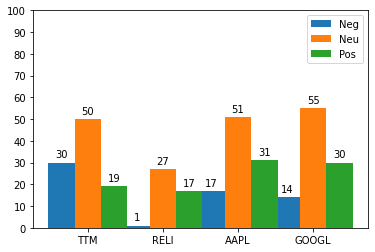

In [ ]:
# Plotting sentiment graph for each company

index = np.arange(len(company_tikcers))
score_label = np.arange(0, 110, 10)

bar_width = 0.35

fig, ax = plt.subplots()
barNeg = ax.bar(index - bar_width, dataset_company['Neg'], bar_width, label='Neg')
barNeu = ax.bar(index, dataset_company['Neu'], bar_width, label='Neu')
barPos = ax.bar(index + bar_width, dataset_company['Pos'], bar_width, label='Pos')

ax.set_xticks(index)
ax.set_xticklabels(company_tikcers)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)


ax.legend()

def insert_data_labels(bars):
  for bar in bars:
    bar_height = bar.get_height()
    ax.annotate('{0:.0f}'.format(bar.get_height()),
                xy=(bar.get_x() + bar.get_width() / 2, bar_height),
                xytext=(0,3),
                textcoords='offset points',
                ha='center',
                va='bottom'
    )

insert_data_labels(barNeg)
insert_data_labels(barNeu)
insert_data_labels(barPos)

plt.show()

In [ ]:
mean_df = dataset.groupby(['Company', 'Date']).mean()

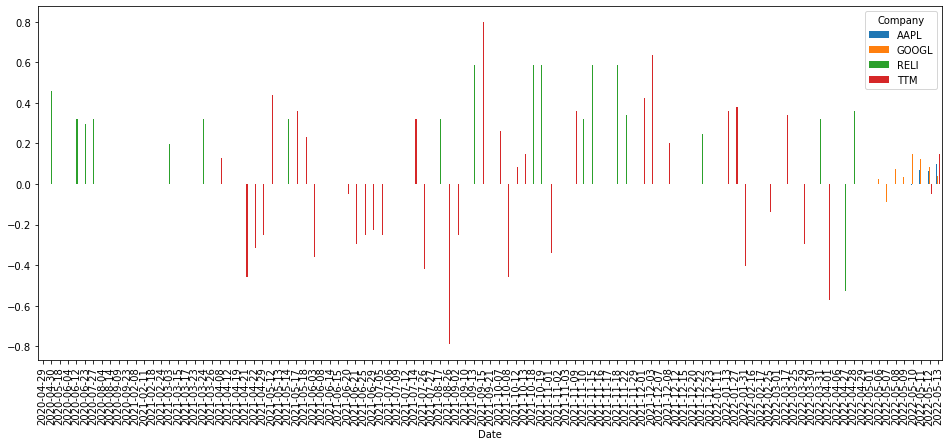

In [ ]:
# plotting an unstack grapgh date wise

mean_df = mean_df.unstack()
mean_df = mean_df.xs('Compound', axis='columns').transpose()
mean_df.plot(kind='bar', figsize=(16.2, 6.5))

In [ ]:
def percentage(part, whole):
  temp = 100 * float(part) / float(whole)
  return format(temp, '.2f')

In [ ]:
def visualization(positive, neutral, negative):
  labels = ['Positive [' + str(positive) + '%]','Neutral [' + str(neutral) + '%]',
            'Negative [' + str(negative) + '%]']
  sizes = [positive, neutral, negative]
  colors = ['lightgreen', 'gold', 'red']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.title('Aggregate sentiment value of the economic news headlines')
  plt.legend(patches, labels, loc="best")
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

In [ ]:
# Specifing sentiments company wise

def company_specific_sentiment_visualization(company_name):
  company_df = dataset[dataset['Company'] == company_name]
  temp = company_df.groupby(['Company', 'Date']).mean()
  temp= temp.unstack()
  temp = temp.xs('Compound', axis='columns').transpose()
  temp.plot(kind='line', figsize=(16.2, 6.5))

In [ ]:
# Matching sentiments of company to the stock prices in csv file

def company_specific_sentiment_and_stockclose_day_focus_visualization(company_name, company_stock_dataframe):
  company_specific = dataset[dataset['Company'] == company_name]
  temp_company = company_specific.groupby(['Company', 'Date']).mean()
  temp_company.to_csv(company_name + '_SentimentAndValueOnDays.csv')

  temp_dataframe = pd.read_csv("/content/" + company_name + "_SentimentAndValueOnDays.csv")
  temp_dataframe['adjclose'] = temp_dataframe.Date.map(company_stock_dataframe.set_index('date')['adjclose'].to_dict())
  temp_dataframe = temp_dataframe.dropna(subset=['adjclose'])
  return temp_dataframe

In [ ]:
def company_compound_adjclose_normalized(company_name, company_combinated_dataframe):
  normalized_df=(company_combinated_dataframe-company_combinated_dataframe.mean())/company_combinated_dataframe.std()

  plt.figure(figsize=(16.2, 6.5))
  plt.title(company_name + ': Normalized AdjClose values with Compounds')
  plt.plot(company_combinated_dataframe['Date'], normalized_df['Compound'], label='compound')
  plt.plot(company_combinated_dataframe['Date'], normalized_df['adjclose'], label='adjclose')
  plt.xticks(rotation=70)
  plt.xlabel('Date')
  plt.ylabel('Compound')
  plt.legend()
  plt.show()

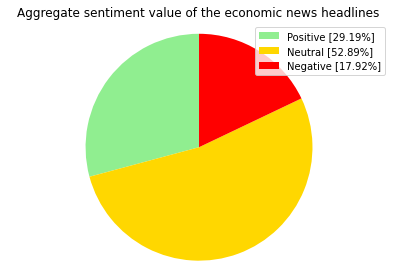

In [ ]:
all_num = sentiment_result['pos'] + sentiment_result['neu'] + sentiment_result['neg']
pos_percent = percentage(part=sentiment_result['pos'], whole=all_num)
neu_percent = percentage(part=sentiment_result['neu'], whole=all_num)
neg_percent = percentage(part=sentiment_result['neg'], whole=all_num)

visualization(positive=pos_percent,neutral=neu_percent, negative=neg_percent)

In [ ]:
ttm_stock = pd.read_csv("/content/TTM_NLTK.csv")
reli_stock = pd.read_csv("/content/RELI_NLTK.csv")
aapl_stock = pd.read_csv("/content/AAPL_NLTK.csv")
googl_stock = pd.read_csv("/content/GOOGLL_NLTK.csv")

In [ ]:
def company_corr(company_stock, company_combinated_dataframe):
  company_data = company_combinated_dataframe.merge(company_stock, on='adjclose')
  company_data.drop(['ticker', 'date'], axis=1, inplace=True)
  company_data.rename(columns = {'Compound_x':'Compound'}, inplace = True) 

  plt.figure(figsize=(16, 10))
  sns.heatmap(company_data[['open', 'low', 'high', 'adjclose', 'Compound', 'volume']].corr(), annot=True)
  plt.show()

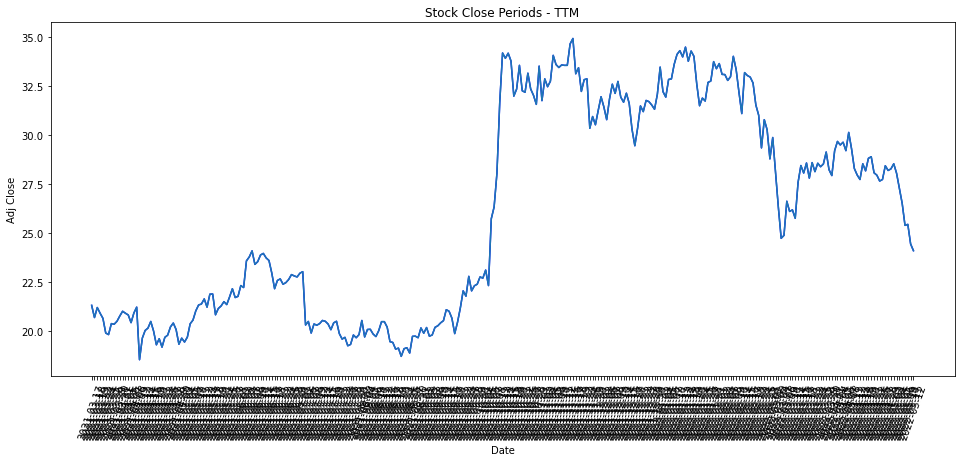

In [ ]:
plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods - TTM')
plt.plot(tatam_stock['adjclose'], label='TTM', color = 'blue')
x = tatam_stock['date']
y = tatam_stock['adjclose']
plt.plot(x, y)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

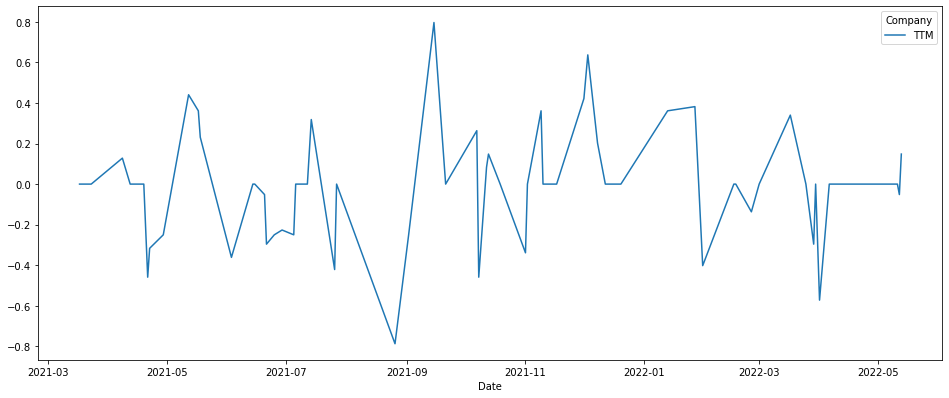

In [ ]:
company_specific_sentiment_visualization('TTM')

In [ ]:
TTM_combinated_dataframe = company_specific_sentiment_and_stockclose_day_focus_visualization('TTM', ttm_stock)
TTM_combinated_dataframe.head()

,Company,Date,Compound,adjclose
0,TTM,2021-03-17,0.000,21.330
1,TTM,2021-03-23,0.000,20.670
2,TTM,2021-04-08,0.128,20.940
3,TTM,2021-04-12,0.000,18.560
4,TTM,2021-04-19,0.000,20.020


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


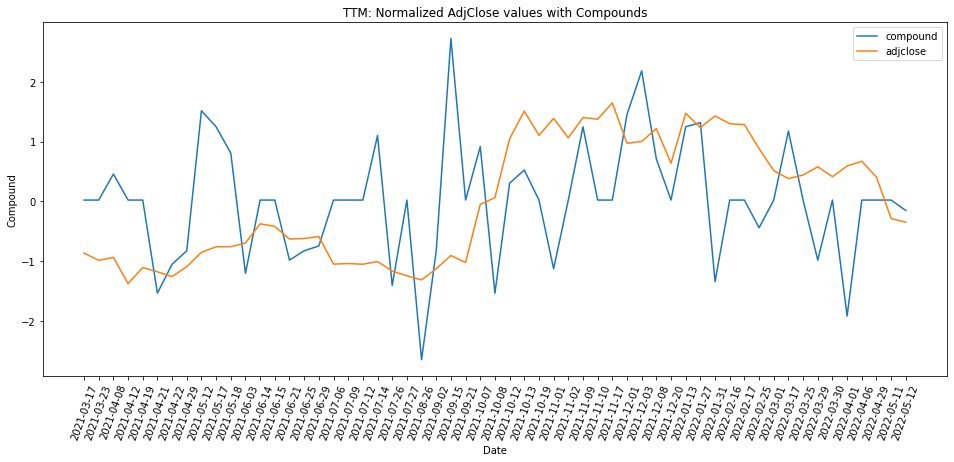

In [ ]:
company_compound_adjclose_normalized('TTM', TTM_combinated_dataframe)

In [ ]:
Timeseries_TTM = TTM_combinated_dataframe
Timeseries_TTM.index = Timeseries_TTM['Date']
Timeseries_TTM = Timeseries_TTM.drop('Date', 1)
Timeseries_TTM.groupby(['Company', 'Date'])
Timeseries_TTM.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Company,Compound,adjclose
Date,,,
2021-03-17,TTM,0.000,21.330
2021-03-23,TTM,0.000,20.670
2021-04-08,TTM,0.128,20.940
2021-04-12,TTM,0.000,18.560
2021-04-19,TTM,0.000,20.020


In [ ]:
Timeseries_TTM['adjclose'].to_csv('Timeseries_TTM_adjclose.csv')
Timeseries_TTM['Compound'].to_csv('Timeseries_TTM_compound.csv')

In [ ]:
TTM_normalized_df=(TTM_combinated_dataframe[['Compound', 'adjclose']]-TTM_combinated_dataframe[['Compound', 'adjclose']].mean())/TTM_combinated_dataframe[['Compound', 'adjclose']].std()
TTM_normalized_df

,Compound,adjclose
Date,,
2021-03-17,0.024,-0.864
2021-03-23,0.024,-0.985
2021-04-08,0.458,-0.936
2021-04-12,0.024,-1.375
2021-04-19,0.024,-1.106
2021-04-21,-1.534,-1.178
2021-04-22,-1.051,-1.257
2021-04-29,-0.825,-1.091
2021-05-12,1.519,-0.851


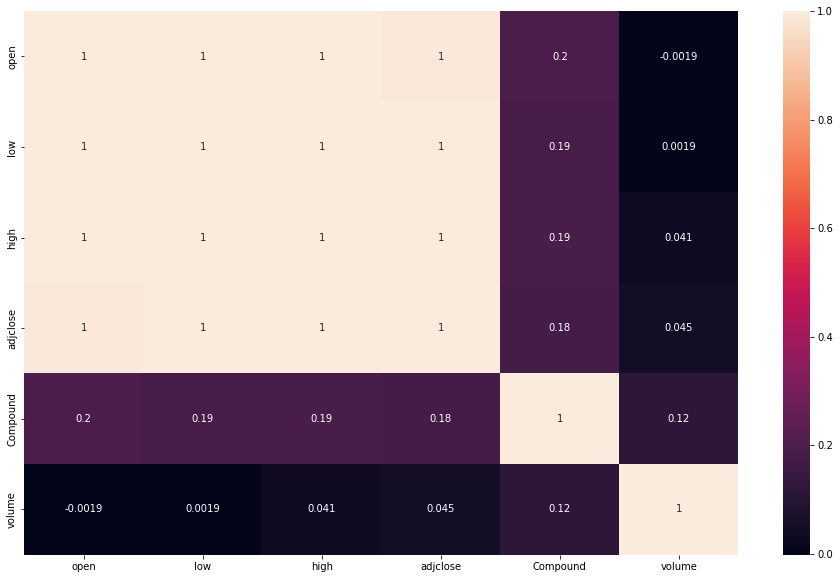

In [ ]:
company_corr(ttm_stock, TTM_combinated_dataframe)
# (Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day.)

In [ ]:
TTM_adjclose_series = pd.read_csv('Timeseries_TTM_adjclose.csv', index_col=[0], parse_dates=True, squeeze=True)
# type(TTM_adjclose_series)
TTM_adjclose_series

Date
2021-03-17   21.330
2021-03-23   20.670
2021-04-08   20.940
2021-04-12   18.560
2021-04-19   20.020
2021-04-21   19.630
2021-04-22   19.200
2021-04-29   20.100
2021-05-12   21.400
2021-05-17   21.900
2021-05-18   21.910
2021-06-03   22.240
2021-06-14   23.980
2021-06-15   23.750
2021-06-21   22.600
2021-06-25   22.650
2021-06-29   22.830
2021-07-06   20.330
2021-07-09   20.380
2021-07-12   20.320
2021-07-14   20.560
2021-07-26   19.700
2021-07-27   19.270
2021-08-26   18.900
2021-09-02   19.910
2021-09-15   21.110
2021-09-21   20.470
2021-10-07   25.750
2021-10-08   26.350
2021-10-12   31.680
2021-10-13   34.200
2021-10-19   32.000
2021-11-01   33.530
2021-11-02   31.770
2021-11-09   33.610
2021-11-10   33.460
2021-11-17   34.940
2021-12-01   31.280
2021-12-03   31.450
2021-12-08   32.610
2021-12-20   29.470
2022-01-13   34.000
2022-01-27   32.700
2022-01-31   33.760
2022-02-16   33.050
2022-02-17   32.970
2022-02-25   30.800
2022-03-01   28.800
2022-03-17   28.080
2022-03-25   28

In [ ]:
TTM_adjclose_series.describe()

count   57.000
mean    26.007
std      5.415
min     18.560
25%     20.670
50%     24.460
75%     31.450
max     34.940
Name: adjclose, dtype: float64

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
ttm_stock.corr()

,open,high,low,close,adjclose,volume
open,1.000,0.999,0.999,0.997,0.997,-0.065
high,0.999,1.000,0.999,0.999,0.999,-0.047
low,0.999,0.999,1.000,0.998,0.998,-0.072
close,0.997,0.999,0.998,1.000,1.000,-0.053
adjclose,0.997,0.999,0.998,1.000,1.000,-0.053
volume,-0.065,-0.047,-0.072,-0.053,-0.053,1.000


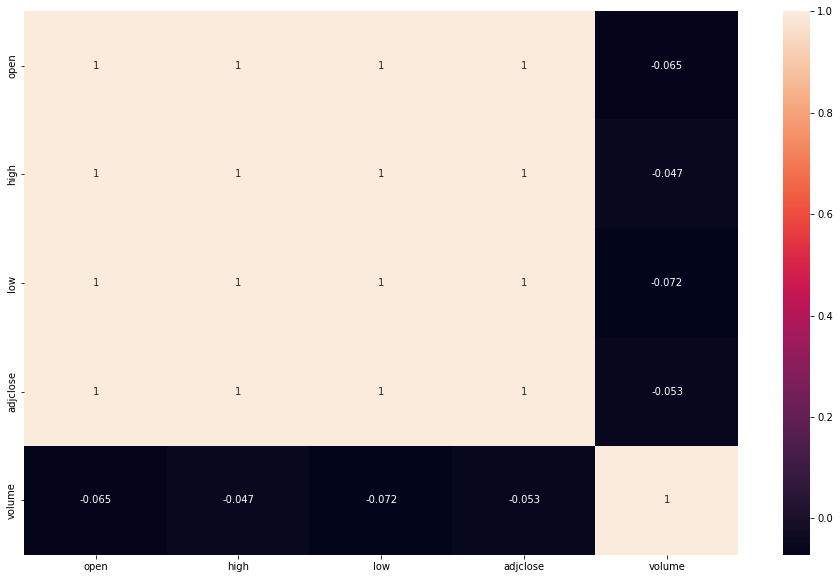

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(ttm_stock[['open', 'high', 'low', 'adjclose', 'volume']].corr(), annot=True)
plt.show()

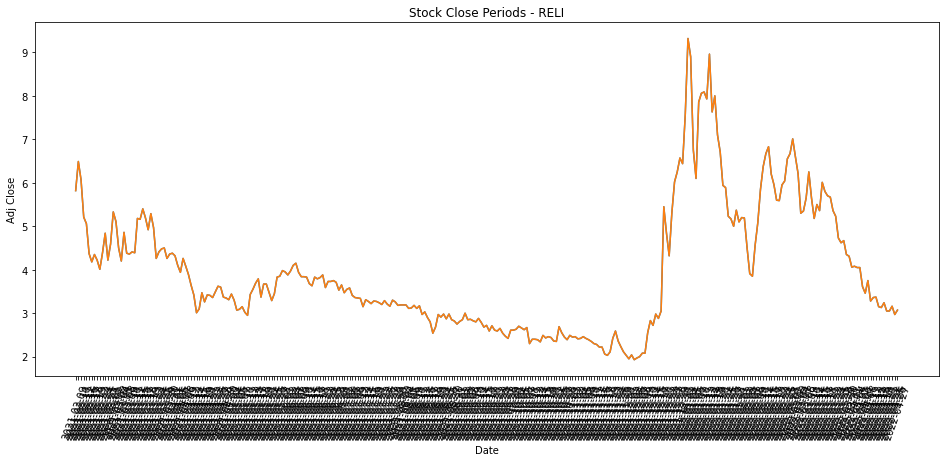

In [ ]:
plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods - RELI')
plt.plot(reli_stock['adjclose'])
x = reli_stock['date']
y = reli_stock['adjclose']
plt.plot(x, y)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

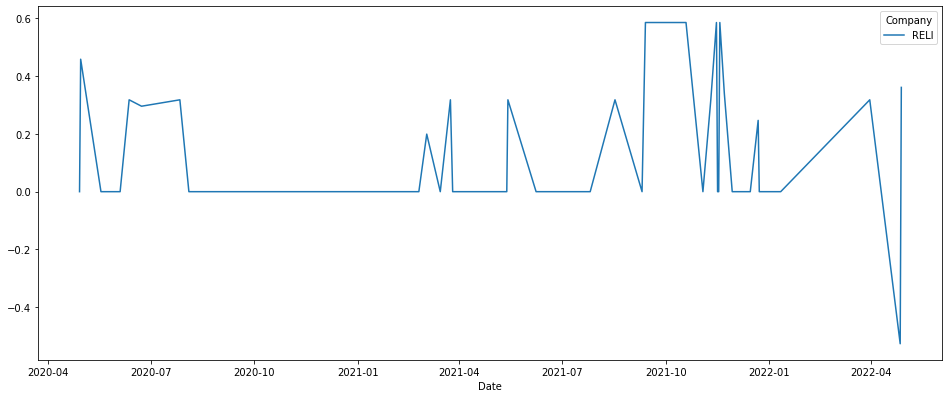

In [ ]:
company_specific_sentiment_visualization('RELI')

In [ ]:
RELI_combinated_dataframe = company_specific_sentiment_and_stockclose_day_focus_visualization('RELI', reli_stock)
RELI_combinated_dataframe.head()

,Company,Date,Compound,adjclose
12,RELI,2021-02-11,0.000,6.070
13,RELI,2021-02-18,0.000,4.180
14,RELI,2021-02-24,0.000,4.390
15,RELI,2021-03-03,0.199,5.110
16,RELI,2021-03-15,0.000,5.180


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


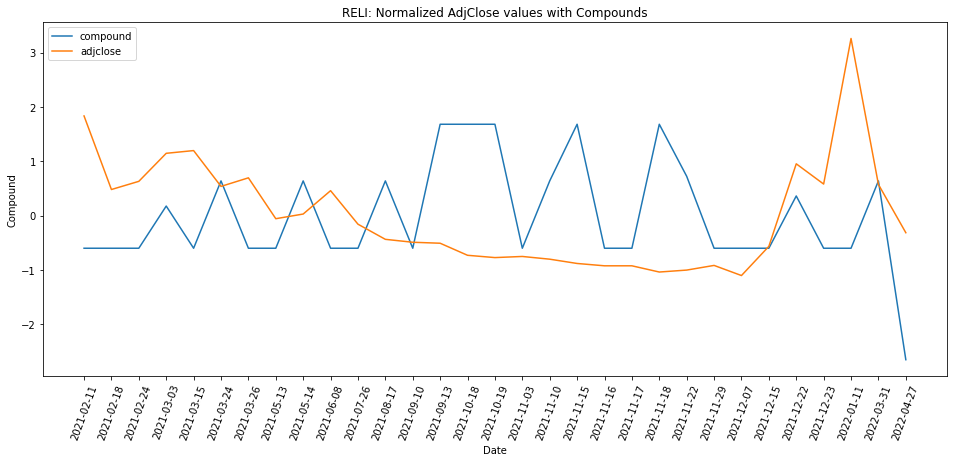

In [ ]:
company_compound_adjclose_normalized('RELI', RELI_combinated_dataframe)

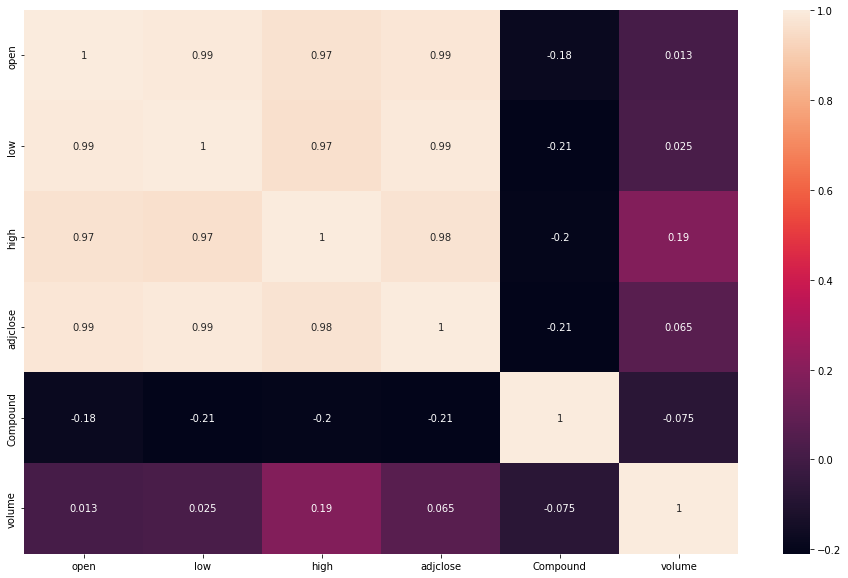

In [ ]:
company_corr(reli_stock, RELI_combinated_dataframe)

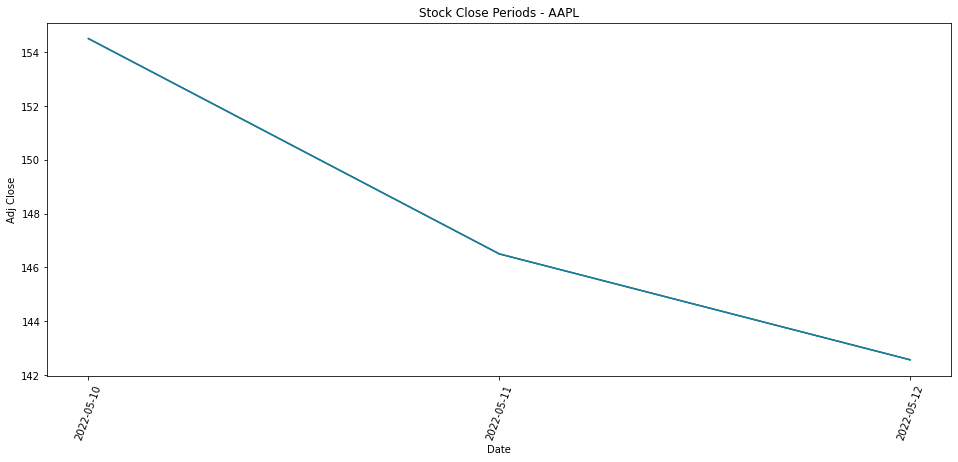

In [ ]:
plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods - AAPL')
plt.plot(aapl_stock['adjclose'], label='AAPL', color = 'green')
x = aapl_stock['date']
y = aapl_stock['adjclose']
plt.plot(x, y)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

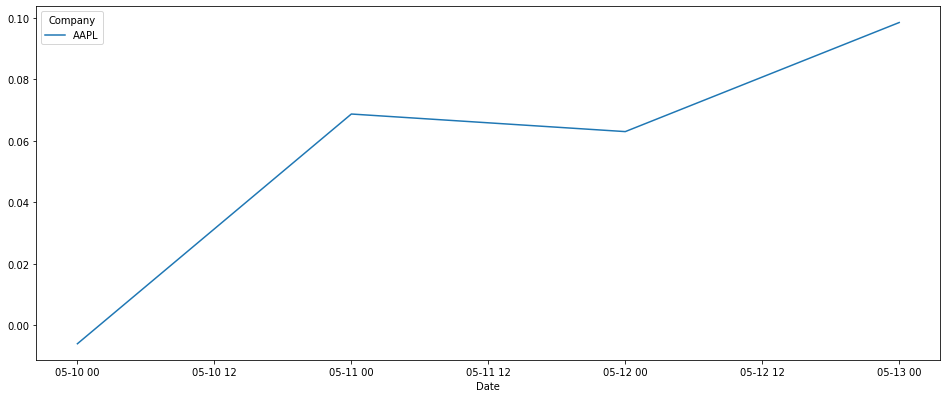

In [ ]:
company_specific_sentiment_visualization('AAPL')

In [ ]:
AAPL_combinated_dataframe = company_specific_sentiment_and_stockclose_day_focus_visualization('AAPL', aapl_stock)
AAPL_combinated_dataframe.head()

,Company,Date,Compound,adjclose
0,AAPL,2022-05-10,-0.006,154.510
1,AAPL,2022-05-11,0.069,146.500
2,AAPL,2022-05-12,0.063,142.560


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


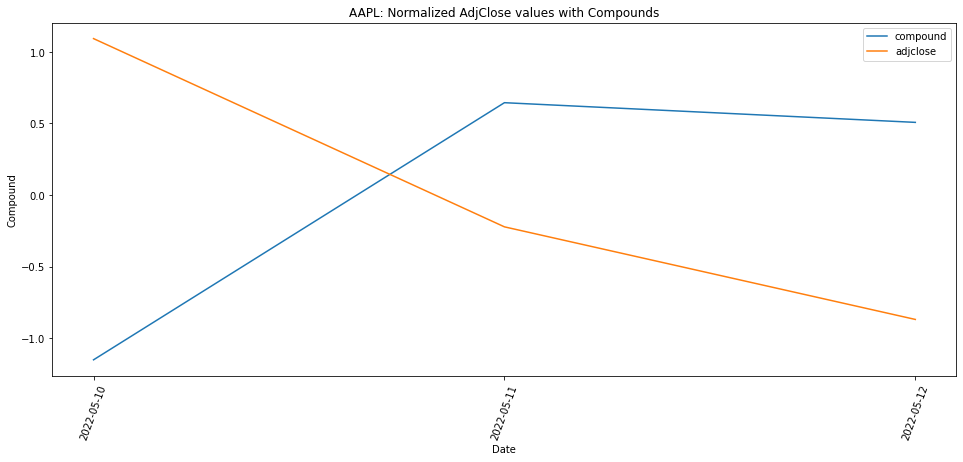

In [ ]:
company_compound_adjclose_normalized('AAPL', AAPL_combinated_dataframe)

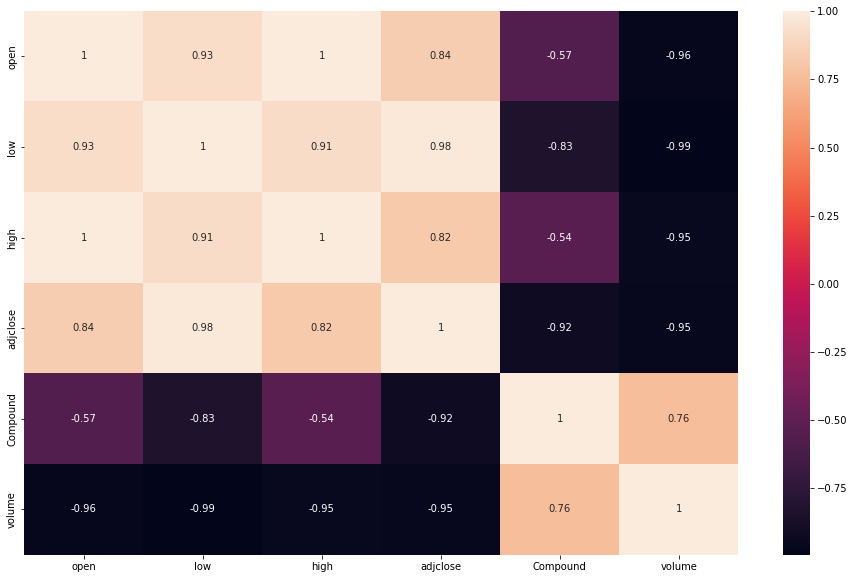

In [ ]:
company_corr(aapl_stock, AAPL_combinated_dataframe)

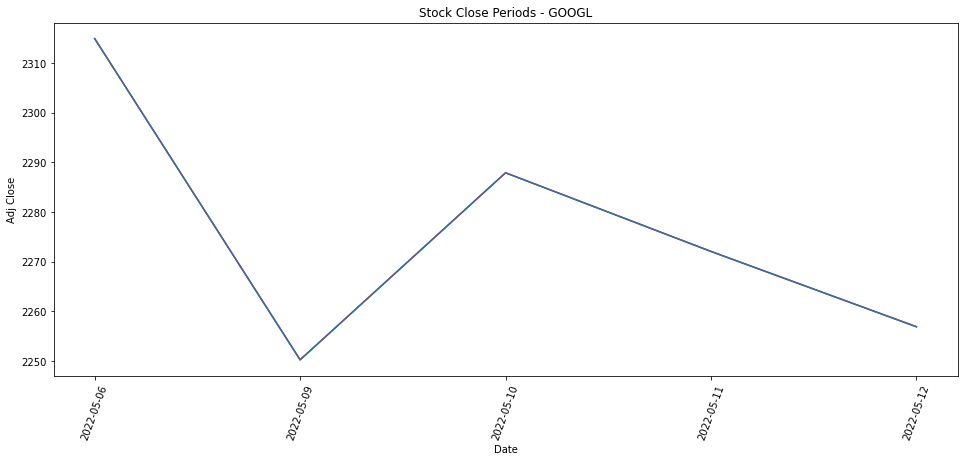

In [ ]:
plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods - GOOGL')
plt.plot(googl_stock['adjclose'], label='GOOGL', color = 'red')
x = googl_stock['date']
y = googl_stock['adjclose']
plt.plot(x, y)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

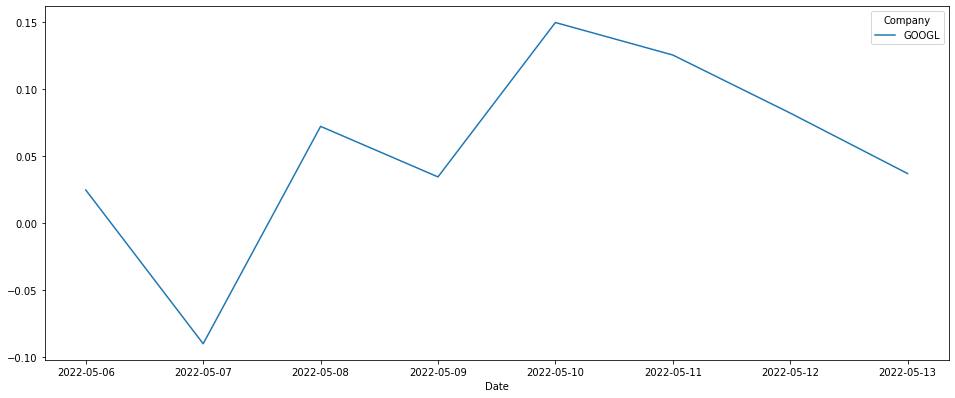

In [ ]:
company_specific_sentiment_visualization('GOOGL')

In [ ]:
GOOGL_combinated_dataframe = company_specific_sentiment_and_stockclose_day_focus_visualization('GOOGL', googl_stock)
GOOGL_combinated_dataframe.head()

,Company,Date,Compound,adjclose
0,GOOGL,2022-05-06,0.025,"2,314.930"
3,GOOGL,2022-05-09,0.034,"2,250.220"
4,GOOGL,2022-05-10,0.149,"2,287.900"
5,GOOGL,2022-05-11,0.125,"2,272.050"
6,GOOGL,2022-05-12,0.082,"2,256.880"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


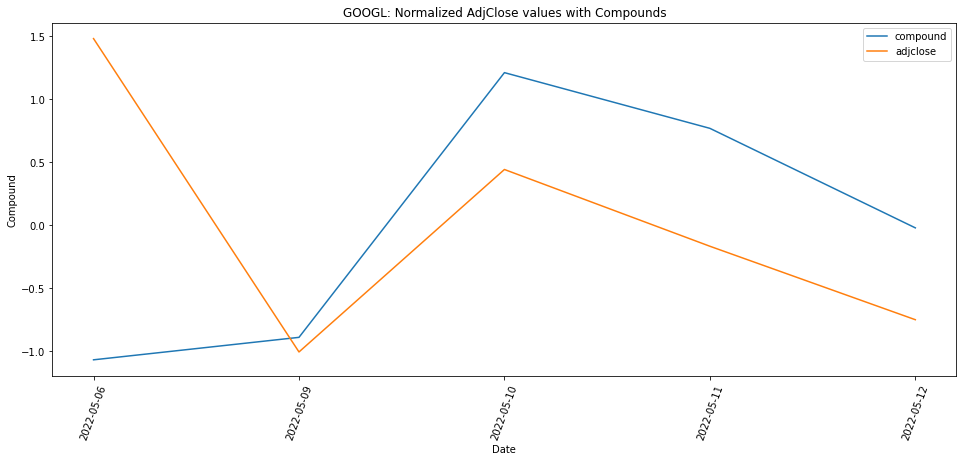

In [ ]:
company_compound_adjclose_normalized('GOOGL', GOOGL_combinated_dataframe)

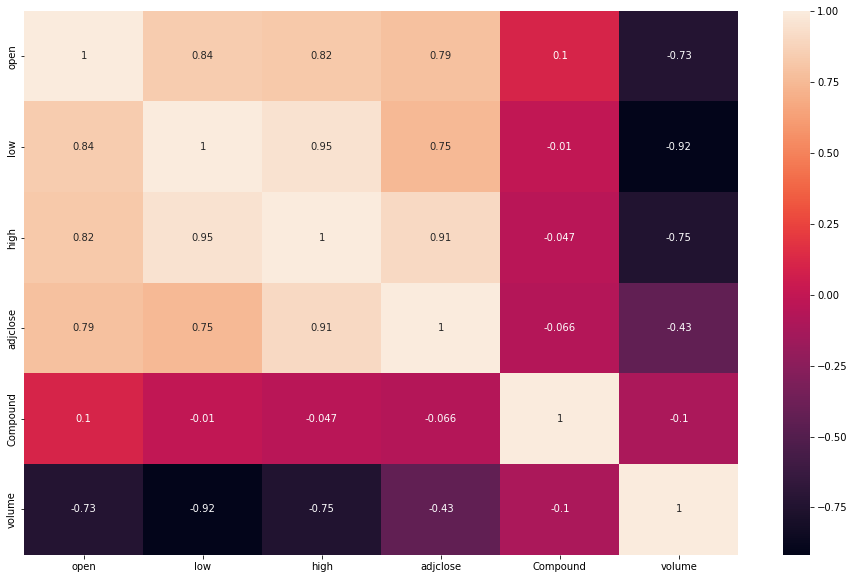

In [ ]:
company_corr(googl_stock, GOOGL_combinated_dataframe)